Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion 
matrix, accuracy, error rate, precision and recall on the given dataset.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv("D:\\BE practicals\\ML\\diabetes.csv")

In [23]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [26]:
df.shape

(768, 9)

In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [29]:
#input data
x=df.drop('Outcome',axis=1)
#output data
y=df['Outcome']

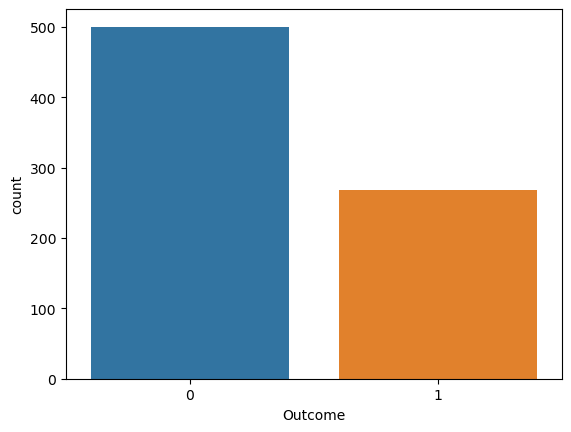

In [30]:
sns.countplot(x=y);

In [31]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [32]:
#feature scaling

scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [33]:
#cross validation

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [34]:
x.shape

(768, 8)

In [35]:
x_train.shape

(576, 8)

In [36]:
x_test.shape

(192, 8)

In [37]:
knn=KNeighborsClassifier(n_neighbors=5)

In [38]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [40]:
y_pred=knn.predict(x_test)

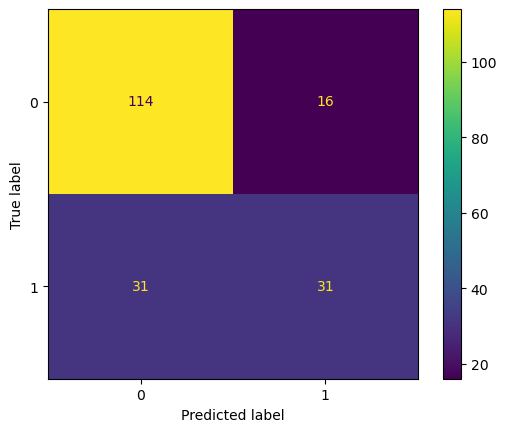

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



In [43]:
#for finding best value of k

import numpy as np
import matplotlib.pyplot as plt

In [44]:
error=[]
for k in range (1,41):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(pred!=y_test))

In [45]:
error

[0.328125,
 0.2708333333333333,
 0.24479166666666666,
 0.2708333333333333,
 0.24479166666666666,
 0.2552083333333333,
 0.234375,
 0.24479166666666666,
 0.21875,
 0.24479166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.234375,
 0.23958333333333334,
 0.21875,
 0.21354166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.22395833333333334,
 0.22916666666666666,
 0.234375,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.21354166666666666,
 0.22395833333333334,
 0.22916666666666666,
 0.20833333333333334,
 0.22916666666666666,
 0.22916666666666666,
 0.234375,
 0.22395833333333334,
 0.22916666666666666,
 0.22395833333333334,
 0.22395833333333334]

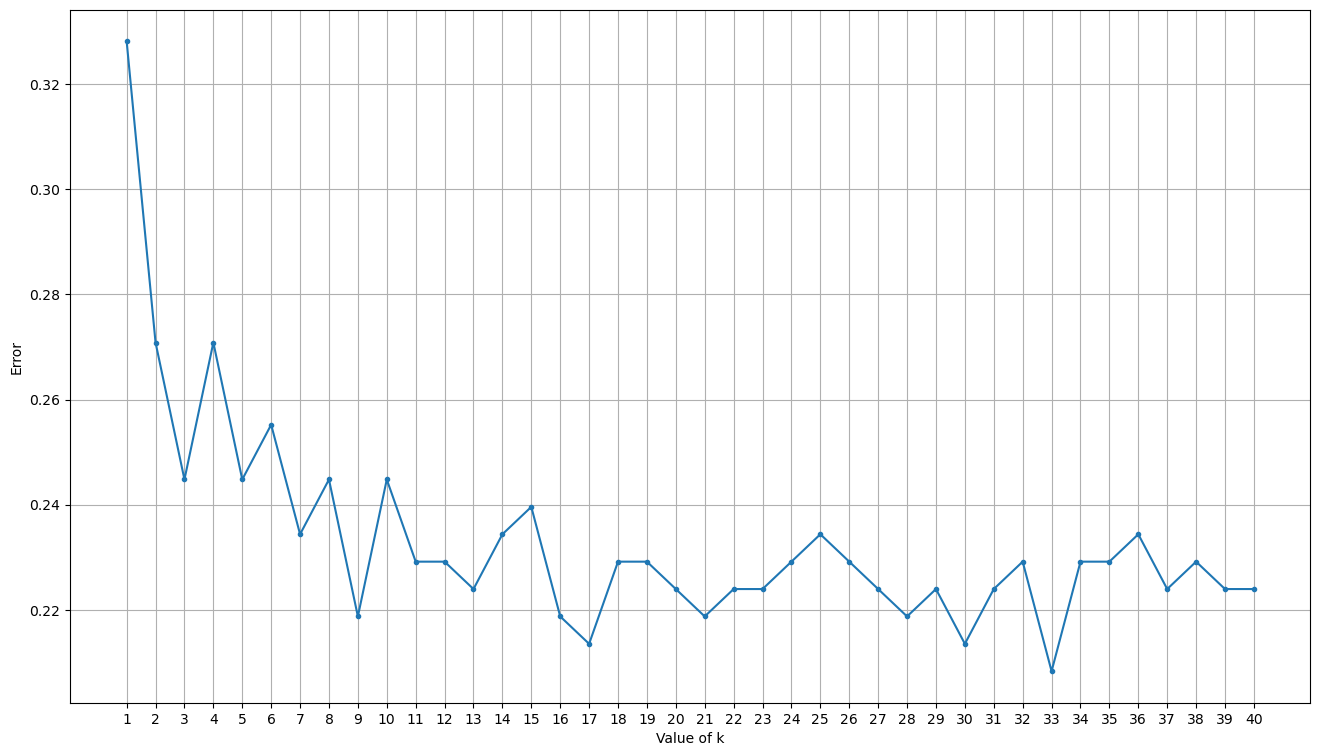

In [46]:
plt.figure(figsize=(16,9))
plt.xlabel('Value of k')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker='.')

In [47]:
#33 will be an ideakl value of k

In [48]:
knn1=KNeighborsClassifier(n_neighbors=33)

In [49]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [50]:
y_pred1=knn1.predict(x_test)

In [51]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192

